# Recurrence of Breast Cancer

## Data
The dataset contains information about 286 women whose breast cancer has treated. It was obtained from the UCI Machine Learning Repository. It contains 10 attributes including the target attribute. 

### Variable information
1. Class : Target variable. Values: no-recurrence event, recurrence event
2. Age: Age (in years at last birthday) of the patientat the time of diagnosis (binned) 10-19, 20-29 etc
3. Menopause: whether the patient is pre- or post-menopausal at time of diagnosis
4.  Tumor size: the greatest diameter (in mm) of the excised tumor
5.  Inv-nodes: the number (range 0 - 39) of axillarylymph nodes that contain metastatic breast can-cer visible on histological examination 
6.  Node caps:  if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain “contained” by the cap-sule of the lymph node. However, over time, and with more aggressive disease, the tumor may re-place the lymph node and then penetrate the cap-sule,  allowing  it  to  invade  the  surrounding  tis-sues
7.  Degree  of  malignancy:   the  histological  grade(range 1-3) of the tumor.  Tumors that are grade1 predominantly consist of cells that, while neo-plastic, retain many of their usual characteristics.Grade  3  tumors  predominately  consist  of  cellsthat are highly abnormal
8.  Breast: breast cancer may obviously occur in ei-ther breast
9.  Breast quadrant:  the breast may be divided intofour  quadrants,  using  the  nipple  as  a  centralpoint
10.  Irradiation:  radiation therapy is a treatment that uses high-energy x-rays to destroy cancer cells.

## Tasks
1. Identify risk factors involved in recurrence events
2. Build model to predict a recurrence event.

In [41]:
library(caret)
library(ggplot2)
library(MLmetrics)

print(sessionInfo())

set.seed(2020)

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] MLmetrics_1.1.1   caret_6.0-86      lattice_0.20-40   ggplot2_3.3.1    
[5] data.table_1.13.0

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3         tidyselect_1.1.0     repr_1.1.0          
 [4] purrr_0.3.4          reshape2_1.4.4       splines_3.6

In [2]:
# read in and check data

breast_dta <- read.csv('breast_cancer.csv', header = FALSE, na.strings = '?')

colnames(breast_dta) <- c('class', 'age', 'menopause', 'tum_size', 
                          'inv_node', 'node_cap', 'deg_malig', 'breast',
                          'breast_quad', 'irrad')

head(breast_dta)
str(breast_dta)

# convert deg_malig to ordered
breast_dta <- within(breast_dta, {
    deg_malig <- ordered(deg_malig)
})

summary(breast_dta)

,class,age,menopause,tum_size,inv_node,node_cap,deg_malig,breast,breast_quad,irrad
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
1,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
3,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
5,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
6,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


'data.frame':	286 obs. of  10 variables:
 $ class      : Factor w/ 2 levels "no-recurrence-events",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ age        : Factor w/ 6 levels "20-29","30-39",..: 2 3 3 5 3 5 4 5 3 3 ...
 $ menopause  : Factor w/ 3 levels "ge40","lt40",..: 3 3 3 1 3 1 3 1 3 3 ...
 $ tum_size   : Factor w/ 11 levels "0-4","10-14",..: 6 4 4 3 1 3 5 4 11 4 ...
 $ inv_node   : Factor w/ 7 levels "0-2","12-14",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ node_cap   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ deg_malig  : int  3 2 2 2 2 2 2 1 2 2 ...
 $ breast     : Factor w/ 2 levels "left","right": 1 2 1 2 2 1 1 1 1 2 ...
 $ breast_quad: Factor w/ 5 levels "central","left_low",..: 2 5 2 3 4 2 2 2 2 3 ...
 $ irrad      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


                  class        age       menopause      tum_size   inv_node  
 no-recurrence-events:201   20-29: 1   ge40   :129   30-34  :60   0-2  :213  
 recurrence-events   : 85   30-39:36   lt40   :  7   25-29  :54   12-14:  3  
                            40-49:90   premeno:150   20-24  :50   15-17:  6  
                            50-59:96                 15-19  :30   24-26:  1  
                            60-69:57                 10-14  :28   3-5  : 36  
                            70-79: 6                 40-44  :22   6-8  : 17  
                                                     (Other):42   9-11 : 10  
 node_cap   deg_malig   breast       breast_quad  irrad    
 no  :222   1: 71     left :152   central  : 21   no :218  
 yes : 56   2:130     right:134   left_low :110   yes: 68  
 NA's:  8   3: 85                 left_up  : 97            
                                  right_low: 24            
                                  right_up : 33            
                

In [3]:
# chi-squared test for independence node_cap v deg_malig
with(breast_dta, chisq.test(node_cap, deg_malig)) # --> reject null hyp

with(breast_dta, table(node_cap, deg_malig))

# node_cap v breast
with(breast_dta, chisq.test(node_cap, breast)) # --> fail to reject null hyp

# node_cap v irrad
with(breast_dta, chisq.test(node_cap, irrad)) # --> reject null hyp
with(breast_dta, table(node_cap, irrad))

# node_cap v breast_quad
with(breast_dta, table(node_cap, inv_node))
with(breast_dta, chisq.test(node_cap, inv_node))


# impute missing values in node_cap using the following rules:
# if deg_malig <= 2: node_cap = 'no' 
# else if inv_node == 0-2: node_cap = 'no'
# else if irrad == no: node_cap = 'no' otherwise node_cap = 'yes'
breast_dta$node_cap[is.na(breast_dta$node_cap)] <- factor(with(breast_dta[is.na(breast_dta$node_cap),], ifelse(deg_malig == 1 | deg_malig == 2, 'no',
                                                                      ifelse(inv_node == '0-2', 'no',
                                                                        ifelse(irrad == 'no', 'no', 'yes')))))
#breast_dta$node_cap <- as.factor(breast_dta$node_cap)

# impute missing values in breast_quad using mode 
breast_dta$breast_quad[is.na(breast_dta$breast_quad)] <- factor('left_low')



	Pearson's Chi-squared test

data:  node_cap and deg_malig
X-squared = 29.859, df = 2, p-value = 3.283e-07


        deg_malig
node_cap   1   2   3
     no   66 103  53
     yes   0  26  30


	Pearson's Chi-squared test with Yates' continuity correction

data:  node_cap and breast
X-squared = 0.0007252, df = 1, p-value = 0.9785



	Pearson's Chi-squared test with Yates' continuity correction

data:  node_cap and irrad
X-squared = 29.077, df = 1, p-value = 6.954e-08


        irrad
node_cap  no yes
     no  188  34
     yes  28  28

        inv_node
node_cap 0-2 12-14 15-17 24-26 3-5 6-8 9-11
     no  201     1     1     0  15   3    1
     yes   9     2     5     1  19  14    6

Warning message in chisq.test(node_cap, inv_node):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  node_cap and inv_node
X-squared = 142.33, df = 6, p-value < 2.2e-16


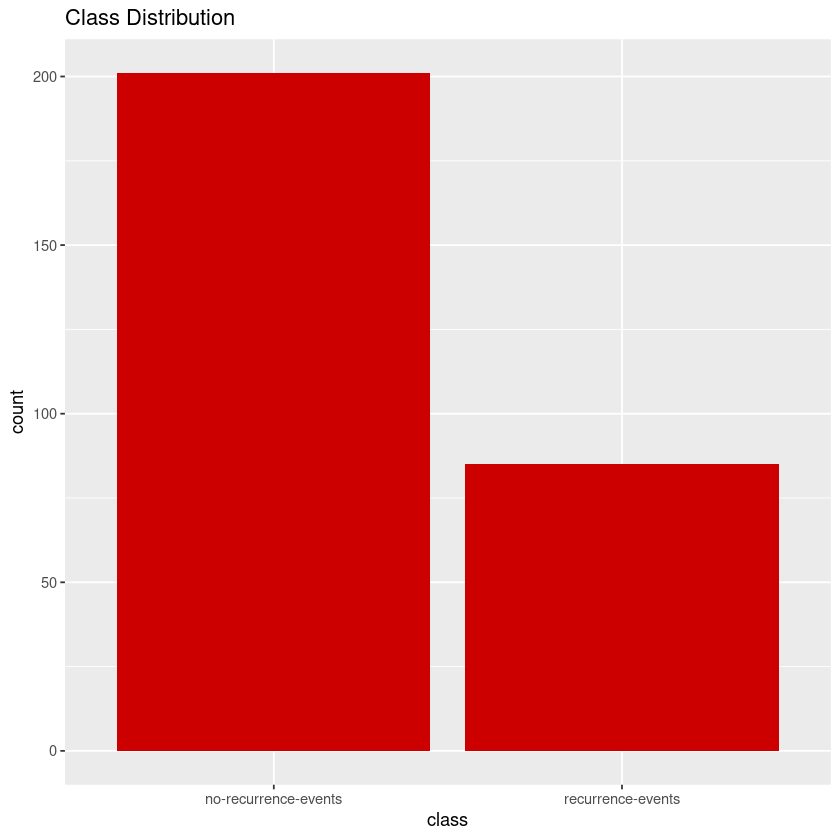

In [17]:
# graphical summaries 

# class distribution
ggplot(breast_dta, aes(x = class)) + 
    geom_bar(fill = 'red3') + 
      labs(title = 'Class Distribution')

# the class is imbalanced, most of the patients didn't have a recurrence event


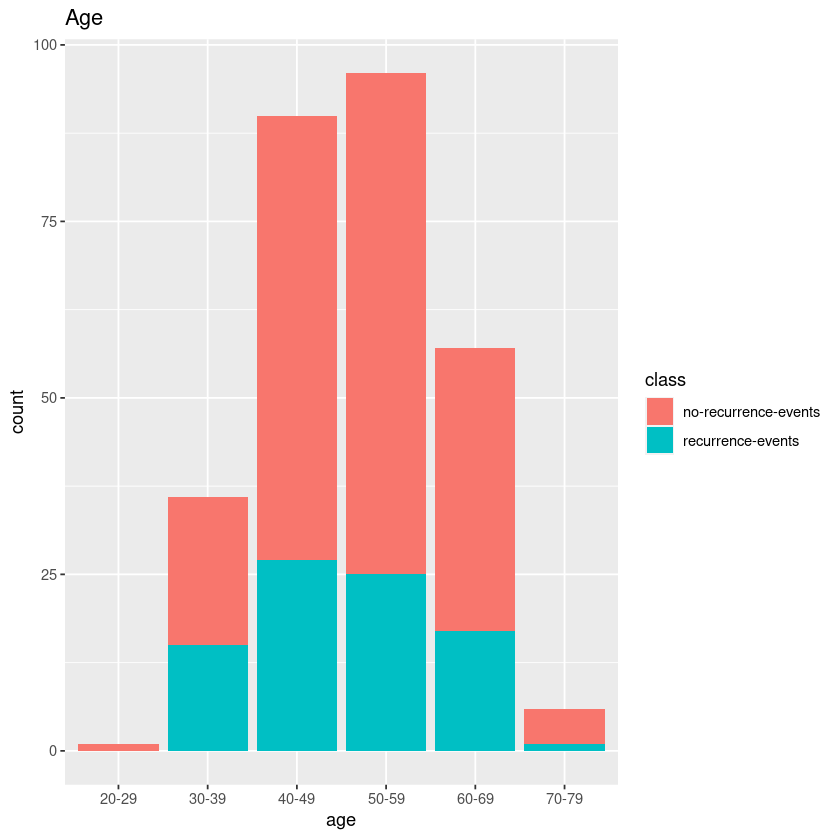

In [18]:
# age v class

ggplot(breast_dta, aes(x = age, fill = class)) + 
       geom_bar() + labs(title = 'Age')
# patients in the 40-59 age group are more likely to 
# to have a recurrence event whereas patients in the 20-29 and 70-79 are less likely
# to have a recurrence event. However this could be due to the small number of patients
# in those age groups.

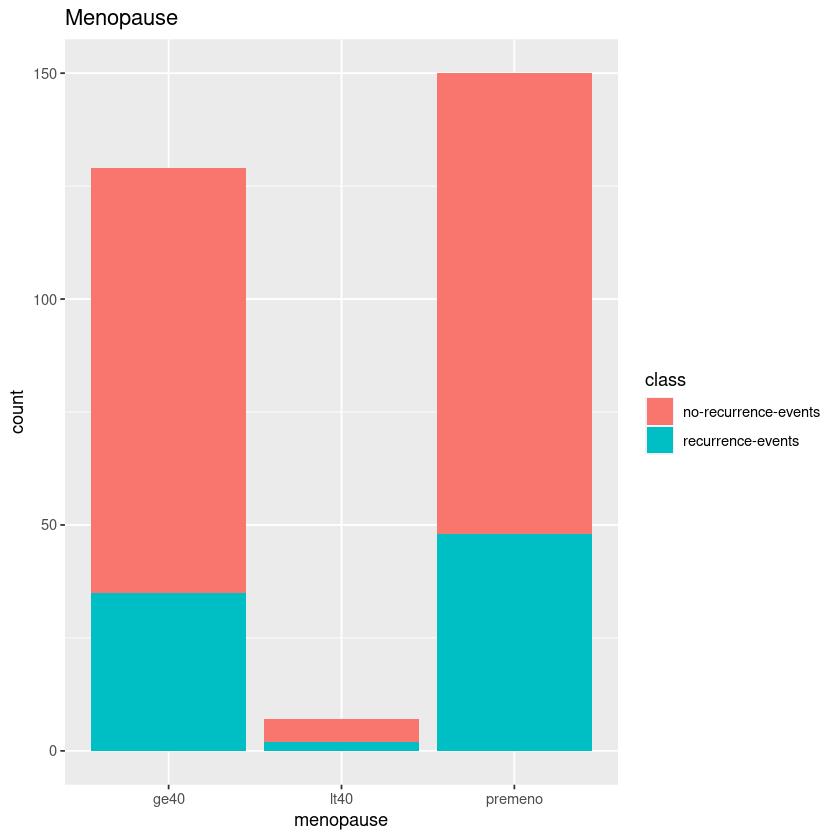

In [19]:
# menopause v class

ggplot(breast_dta, aes(x = menopause, fill = class)) + geom_bar() + labs(title = 'Menopause')
# there is no apparent relationship between menopause age and 
# a recurrence event

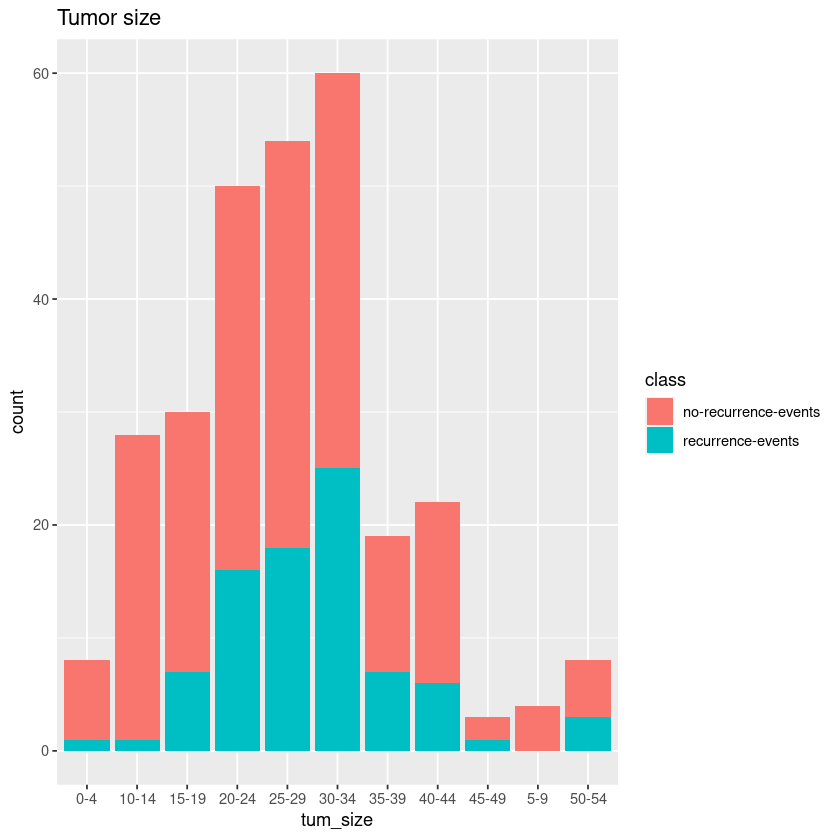

In [20]:
# tumor_size v class
ggplot(breast_dta, aes(x = tum_size, fill = class)) + geom_bar() + labs(title = 'Tumor size')

# tumor sizes in the range 25-34 mm had the highest rates of recurrence events
# steady increases in likelihood of recurrence event happening as tumor size 
# increases from 0-34 mm, then a decrease from 35-54 mm.
#
# this suggests that if the tumor size is very small, it can easily be destroyed
# thus reducing the chances of a recurrence event. Similarly, if the tumor sizes are very large,
# and removed by surgical approaches for example, the likelihood of a recurrence event decreases.bb

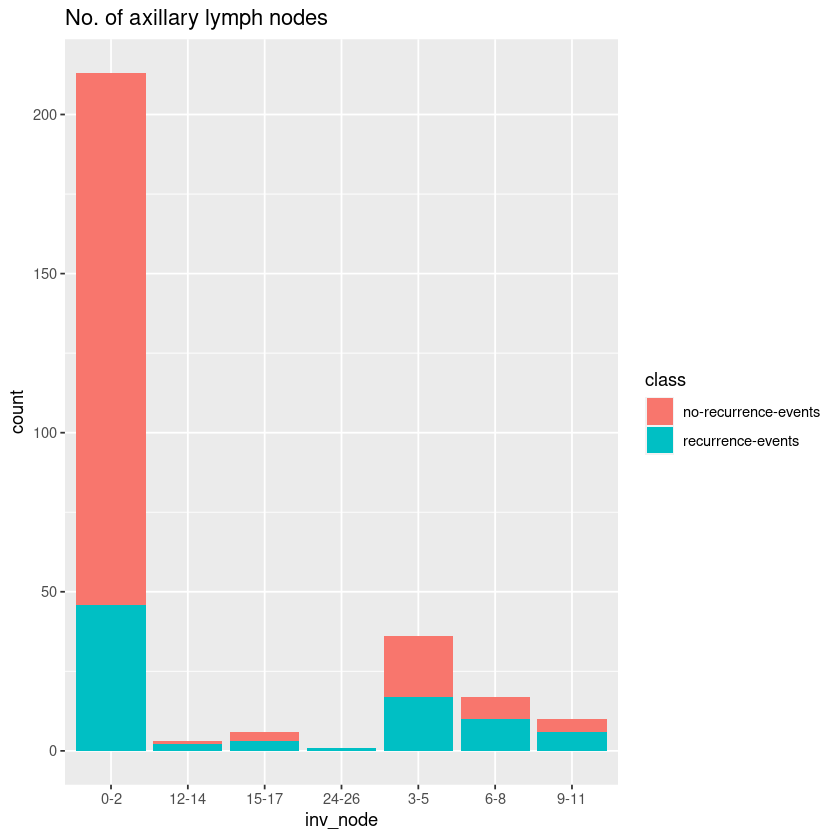

In [21]:
# inv_node v class
ggplot(breast_dta, aes(x = inv_node, fill = class)) + geom_bar() + 
   labs(title = 'No. of axillary lymph nodes')

# no immediate relationship can be deduced from the chart

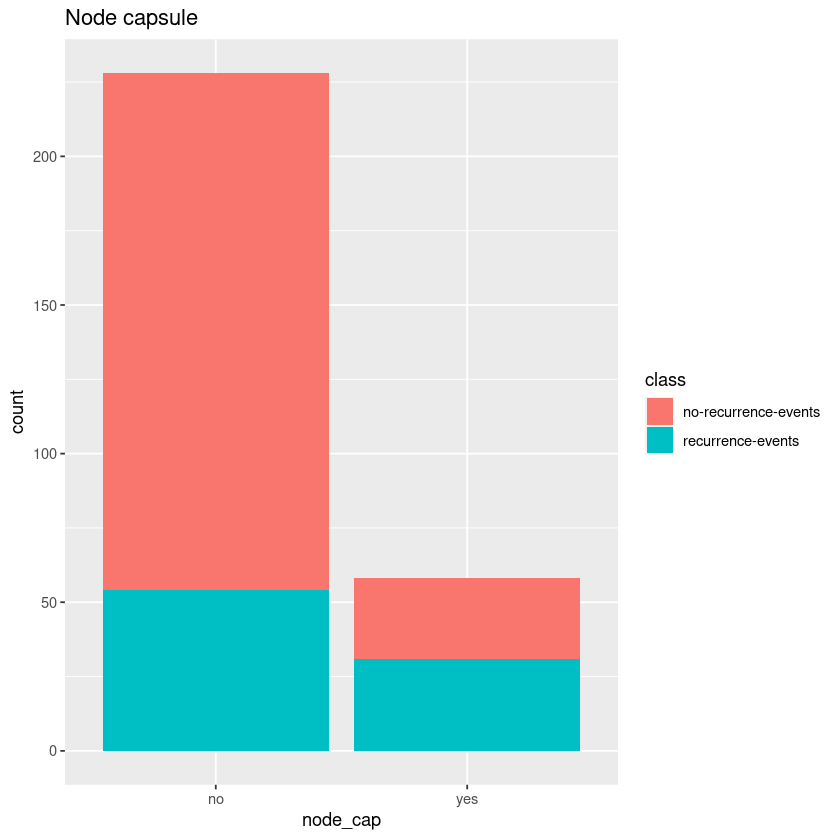

In [22]:
# node_cap v class

ggplot(breast_dta, aes(x = node_cap, fill = class)) + geom_bar() + labs(title = 'Node capsule')

# recurrence event more likley if the cancer metastasises to a lymph node

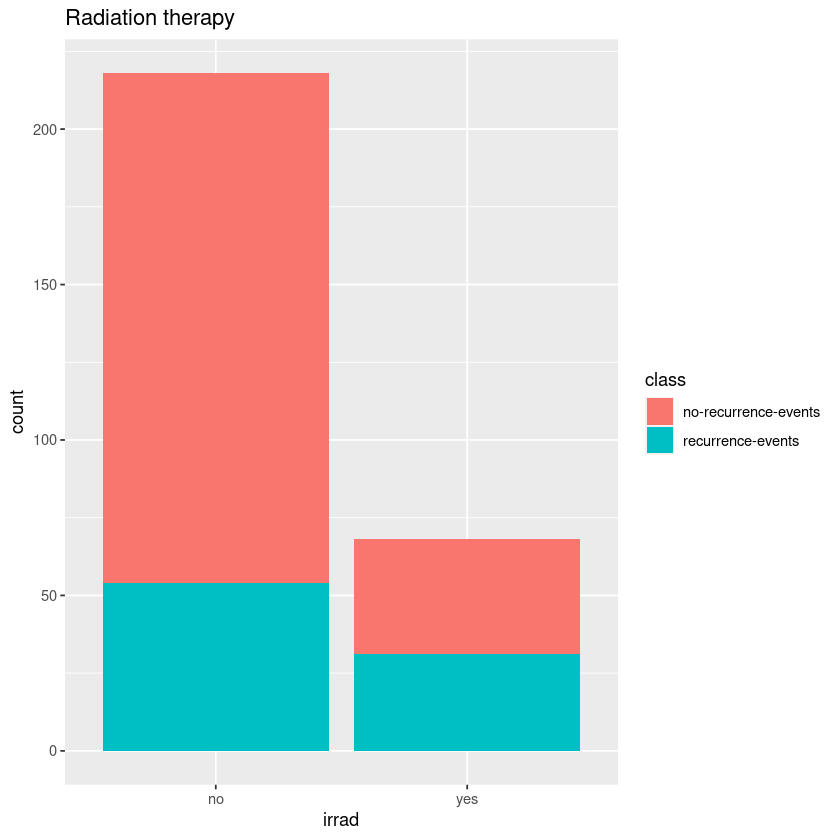

In [23]:
# irrad v class
ggplot(breast_dta, aes(x = irrad, fill = class)) + geom_bar() + labs(title = 'Radiation therapy')

# recurrence event more likely if radiation therapy was used.

In [55]:
# model building
#
# in our models, we'll put a preference on reducing the false-negative rate
# given the context of the problem. that is, while we want a fairly accurate model,
# a more suitable model will be one that doesn't predict no recurrence for a patient 
# that will have a recurrence. Hence, we use the Precision metric in training our models.

# split data into 80-20 split
train_inds <- with(breast_dta, createDataPartition(class, p = 0.8, list = TRUE)[[1]])

train_data <- breast_dta[train_inds, ]
test <- breast_dta[-train_inds, ]

dim(train_data)
dim(test)

train_ctrl <- trainControl(method = 'cv', number = 5, summaryFunction = prSummary)


# decision tree

decision_tree <- train(class ~.,
                      data = breast_dta,
                      method = 'rpart',
                      trControl = train_ctrl,
                      metric = 'Precision',
                      parms = list(split = c('gini', 'information')),
                      tuneLength = 10)

decision_tree

[1] 229  10

[1] 57 10

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

286 samples
  9 predictor
  2 classes: 'no-recurrence-events', 'recurrence-events' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 229, 229, 229, 228, 229 
Resampling results across tuning parameters:

  cp           AUC  Precision  Recall     F        
  0.000000000  NaN  0.7410687  0.8704878  0.8004449
  0.009150327  NaN  0.7410687  0.8704878  0.8004449
  0.018300654  NaN  0.7476889  0.8804878  0.8076727
  0.027450980  NaN  0.7476889  0.8804878  0.8076727
  0.036601307  NaN  0.7360648  0.8804878  0.8004175
  0.045751634  NaN  0.7349536  0.9054878  0.8099828
  0.054901961  NaN  0.7439384  0.8754878  0.8026395
  0.064052288  NaN  0.7494522  0.8654878  0.8003881
  0.073202614  NaN  0.7428315  0.8850000  0.8034073
  0.082352941  NaN  0.7430186  0.8150000  0.7734574

Precision was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.06405229.

In [56]:
# test model on validaiton set

preds <- predict(decision_tree, test)

confusionMatrix(data = preds, reference = test$class, mode = 'prec_recall')

Confusion Matrix and Statistics

                      Reference
Prediction             no-recurrence-events recurrence-events
  no-recurrence-events                   39                 9
  recurrence-events                       1                 8
                                              
               Accuracy : 0.8246              
                 95% CI : (0.7009, 0.9125)    
    No Information Rate : 0.7018              
    P-Value [Acc > NIR] : 0.02576             
                                              
                  Kappa : 0.5153              
                                              
 Mcnemar's Test P-Value : 0.02686             
                                              
              Precision : 0.8125              
                 Recall : 0.9750              
                     F1 : 0.8864              
             Prevalence : 0.7018              
         Detection Rate : 0.6842              
   Detection Prevalence : 0.8421            

In [58]:
random_forest <- train(class ~.,
                       data = breast_dta,
                       method = 'rf',
                       trControl = train_ctrl,
                       metric = 'Precision',
                       tuneLength = 10)

random_forest

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Random Forest 

286 samples
  9 predictor
  2 classes: 'no-recurrence-events', 'recurrence-events' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 229, 229, 229, 228, 229 
Resampling results across tuning parameters:

  mtry  AUC  Precision  Recall     F        
   2    NaN  0.7049248  0.9750000  0.8180858
   5    NaN  0.7474390  0.9151220  0.8225640
   8    NaN  0.7666502  0.8852439  0.8215308
  12    NaN  0.7715774  0.8754878  0.8200025
  15    NaN  0.7693394  0.8654878  0.8142013
  18    NaN  0.7668845  0.8506098  0.8061573
  22    NaN  0.7687349  0.8606098  0.8118675
  25    NaN  0.7633754  0.8354878  0.7975372
  28    NaN  0.7645173  0.8406098  0.8005510
  32    NaN  0.7621633  0.8304878  0.7946241

Precision was used to select the optimal model using the largest value.
The final value used for the model was mtry = 12.

In [59]:
# performance on test set

rf_preds <- predict(random_forest, test)

confusionMatrix(data = rf_preds, reference = test$class, mode = 'prec_recall')

Confusion Matrix and Statistics

                      Reference
Prediction             no-recurrence-events recurrence-events
  no-recurrence-events                   40                 1
  recurrence-events                       0                16
                                              
               Accuracy : 0.9825              
                 95% CI : (0.9061, 0.9996)    
    No Information Rate : 0.7018              
    P-Value [Acc > NIR] : 4.309e-08           
                                              
                  Kappa : 0.9574              
                                              
 Mcnemar's Test P-Value : 1                   
                                              
              Precision : 0.9756              
                 Recall : 1.0000              
                     F1 : 0.9877              
             Prevalence : 0.7018              
         Detection Rate : 0.7018              
   Detection Prevalence : 0.7193            